# Webscraping & Applied ML
<p> </p>
Sarujan DENSON <br>
Yahya EL OUDOUNI <br>
Mohamed Houssem REZGUI <br>
DIA 2

# Data cleaning

## Hotel dataset

Thanks to the API, we have collected the data of 45 hotels and it doesn't contain any errors or any missing values. But we have collected them in a json file. So now we have to convert them into a csv file.

In [42]:
import json
import csv

def json_to_csv(json_file,csv_file):
    #Load the json file
    with open(json_file,'r',encoding='utf-8') as f:
        data=json.load(f)
    #Names of fields we would like to have in our csv file
    fields=["chainCode","iataCode","dupeId","name","hotelId","latitude","longitude","countryCode","value","unit","amenities","rating","lastUpdate"]

    #Write in the csv file
    with open(csv_file,'w',newline='',encoding='utf-8') as csvfile:
        writer=csv.DictWriter(csvfile,fieldnames=fields)
        writer.writeheader() #headers

        #Collect the value of eeach field of the json file to put it on the csv file
        for item in data.get("data",[]):
            row={
                "chainCode":item.get("chainCode"),
                "iataCode":item.get("iataCode"),
                "dupeId":item.get("dupeId"),
                "name":item.get("name"),
                "hotelId":item.get("hotelId"),
                "latitude":item.get("geoCode",{}).get("latitude"),
                "longitude":item.get("geoCode",{}).get("longitude"),
                "countryCode":item.get("address",{}).get("countryCode"),
                "value":item.get("distance",{}).get("value"),
                "unit":item.get("distance",{}).get("unit"),
                "amenities": ",".join(item.get("amenities",[])),
                "rating":item.get("rating"),
                "lastUpdate":item.get("lastUpdate")
            }
            writer.writerow(row)

json_file='/content/paris_hotels_list.json'  #input file in json format
csv_file='paris_hotels.csv'    #output file in csv format
json_to_csv(json_file,csv_file)
print(f"Data of Paris hotels in csv format: {csv_file}")

Data of Paris hotels in csv format: paris_hotels.csv


## Restaurant dataset

Thanks to our scraping code with Selenium and Beautifulsoup, we have collected data of Paris restaurants from the website TheFork. We have collected data of 100 restaurants and we put them in a csv file. We got information about the name of the restaurant, the link of the website of the specific restaurant, the address, the Price, the speciality of the restaurant, the ratings, the description of the restaurant, the menu and the reviews. But the scraping doesn't perform well because we contains some errors, some bad lines and some missing values when we put the scraped data in the csv file. So now, we're gonna clean it and export in a new csv file for a machine learning problem.

First step:


*   We're gonna remove quotes from fields and values
*   We're gonna replace comma with hyphens in "description", "menu" and "reviews" fields to avoid confusion with delimiters in the csv file

In [43]:
def clean_csv(input_file,output_file):

    with open(input_file,'r',encoding='utf-8') as infile:
        reader=csv.reader(infile) #read the restaurant csv file
        headers=next(reader) #clean the headers by removing quotes
        clean_headers=[header.strip('"') for header in headers]

        #Clean the data by removing comma in "description", "menu" and "reviews" fields and replacing them with hyphens
        cleaned_data=[]
        for row in reader:
            clean_row=[]
            for value in row:
                clean_value=value.strip('"').replace(",","-") #put hyphens
                clean_row.append(clean_value)
            cleaned_data.append(clean_row)

    #write in a new csv file containing restaurant data
    with open(output_file,'w',newline='',encoding='utf-8') as outfile:
        writer=csv.writer(outfile)
        writer.writerow(clean_headers)  #with clean headers
        writer.writerows(cleaned_data)  #withe clean data

input_file='/content/all_restaurants_thefork_paris_detailed.csv'  #input file
output_file='paris_restaurants.csv'  #output file
clean_csv(input_file,output_file)
print(f"First version of the csv file of restaurant data: {output_file}")

First version of the csv file of restaurant data: paris_restaurants.csv


Now we can read the csv file which contains data of Paris restaurants

In [44]:
import pandas as pd
df = pd.read_csv('/content/paris_restaurants.csv', delimiter=',', quoting=3, on_bad_lines='skip')
df

,Title,Link,Address,Price,Type_of_Restaurant,Mark,Number_of_Reviews,Image,Ambiance,Plats,Service,Description,Menu,Avis
0,Asahi,https://www.thefork.fr/restaurant/asahi-r47875#rankedBy=SEARCH_ENGINE,56- rue de Belleville- 75020- Paris,20 €,Japonais,9-4,281.0,https://res.cloudinary.com/tf-lab/image/upload/w_500-h_500-c_fill-g_auto:subject-q_auto-f_auto/restaurant/79f4d757-3796-4740-81a7-fc944256ed22/7a8500df-74e9-4610-952f-85d695be844e.jpg,9.4,9.5,9.5,JAPONAIS PIONNIER – Monsieur YE est un pionnier ! Il a lancé le restaurant Asahi en 1999- c'était alors l'un des premiers restaurants japonais de Paris dans le 20ème arrondissement de Paris- à deux pas du métro Belleville. Aujourd'hui- ses sushi- maki- sashimi- tempura et yakitori font toujours recette et répondent à toutes les exigences de ses clients.CUISINE TRADITIONNELLE - Dans ce lieu design et branché- vous découvrirez une cuisine traditionnelle japonaise travaillée et innovante- à base de produits frais et de qualité. Ici- les plats sont préparés à la commande et les brochettes grillées au charbon de bois.SAKÉ – Une dégustation de saké s'impose ! Le restaurant Asahi propose une large variété de cet alcool directement importé du Japon.,Takoyaki- Wakame- Karaage- Ikageso- Carpaccio de thon- Yuki Ba~ Ga~- Shake korokke Don- Takaki de saumon- Summer Roll- Moriawase- Maguro- Buta ramen- Mochi gâteau haricot rouge- Mochis glacés (2pc)- MB3- MB4- Thé Matcha,Cadre sympathique- service rapide et bons conseils.Plats très savoureux. Les ramens sont très bons.A tester sans hésiter! Salle chic- lumineuse et comfortable. Plats raffinés et gouteux. un vrai japonais donc une vrai cuisine japonaise. Excellent et prix très abordables. A refaire Dès notre arrivée nous avons été accueillis chaleureusement et notre réservation était bien conforme . La cuisine est délicieuse et le service rapide . Les conseils sont précis et ne poussent pas à la consommation . Je recommande vivement . Makis délicieux- service rapide- ambiance calme- je recommande !! Le service long- j’ai du réclamer les boissons à plusieurs reprises- le ris a sushi - une bouillie- l’addition est salé. Très déçue. Asahi est un restaurant très agréable niché au cœur d'un quartier sympa. Bon sushi- bon restaurant- plats variés- décor assez joli- même si je préfère personnellement l’ancien décor- j’y reviendrais Parfait comme à chaque fois. Les plats sont délicieux- le personnel attentif. Très bon restaurant japonais. Bonne ambiance- déco sympa- bonne cuisine- personnel sympathique. A recommander si vous passez dans le quartier !
1,Le Fil Rouge Café,https://www.thefork.fr/restaurant/le-fil-rouge-cafe-r11104#rankedBy=SEARCH_ENGINE,3- rue René Boulanger- 75010- Paris,26 €,Américain,9-4,511.0,https://res.cloudinary.com/tf-lab/image/upload/w_500-h_500-c_fill-g_auto:subject-q_auto-f_auto/restaurant/e769b319-e30b-418d-bd1f-a2cebf32f449/7312c1e0-cce0-4e0f-95b0-675d02f8b564.jpg,9.5,9.2,9.6,En plein coeur du 10e arrondissement- à deux pas de République- la devanture du restaurant Le Fil Rouge interpellera votre regard. Poussez les portes et installez-vous dans un décor typiquement américain des années 50. Juke box- Vespa et bien plus encore habillent les murs : rétro et tendance s'allient à merveille. Côté palais- préparez-vous à une escapade gustative direction l'Amérique. La carte décline une farandole de spécialités outre-atlantiques telles que des burgers variées- des quesadillas ou nachos à la Mexicaine. Sans oublier le fameux cheesecake ou les brownies pour les gourmands ! Cette adresse colorée et conviviale est une table agréable pour un repas ou un dîner en famille. En saison estivale- prenez place en terrasse et profitez du bon temps.,Sticks mozzarella- Oignons rings (5 pièces)- Quasadilla- Tortillas chips- Nachos- 6 escargots de bourgogne- Salade cesar- Salade cobb- Salade florida- Salade végétarienne au chèvre rôti au miel- Bacon cheddar- Bagel végétarien- Bagel saumon fumé- Blt Burger- Callie's burger- New orleans- Poulet californi

So now, we can read our csv file. But we have to remove 10 lines of data because they are considered as bad lines in the csv file for some reasons with our scraping methods. Now, there are 90 restaurants in our new csv file.

Second step :    


*   We're gonna remove '€' from the price
*   We replace the hyphen by a dot for the "mark" field
*   We create a new column with only the last two digits of postal code
*   We change the type of the column "number_of_reviews" (float to Integer)


In [45]:
df['Price']=df['Price'].str.replace('€','').str.strip()

df['Mark']=df['Mark'].str.replace('-','.', regex=False)

#For the postal code, we use something like a regex filter to detect a sequence of 5 digits in the address field to get only the postal code and we collect the last two digits of the postal code to create our new column
df['PostalCode_LastTwo']=df['Address'].str.extract(r'(\d{5})')[0].str[-2:]

df['Number_of_Reviews']=df['Number_of_Reviews'].fillna(0).astype(int)

df.to_csv('/content/paris_restaurants_2.csv',index=False)
df

,Title,Link,Address,Price,Type_of_Restaurant,Mark,Number_of_Reviews,Image,Ambiance,Plats,Service,Description,Menu,Avis,PostalCode_LastTwo
0,Asahi,https://www.thefork.fr/restaurant/asahi-r47875#rankedBy=SEARCH_ENGINE,56- rue de Belleville- 75020- Paris,20,Japonais,9.4,281,https://res.cloudinary.com/tf-lab/image/upload/w_500-h_500-c_fill-g_auto:subject-q_auto-f_auto/restaurant/79f4d757-3796-4740-81a7-fc944256ed22/7a8500df-74e9-4610-952f-85d695be844e.jpg,9.4,9.5,9.5,JAPONAIS PIONNIER – Monsieur YE est un pionnier ! Il a lancé le restaurant Asahi en 1999- c'était alors l'un des premiers restaurants japonais de Paris dans le 20ème arrondissement de Paris- à deux pas du métro Belleville. Aujourd'hui- ses sushi- maki- sashimi- tempura et yakitori font toujours recette et répondent à toutes les exigences de ses clients.CUISINE TRADITIONNELLE - Dans ce lieu design et branché- vous découvrirez une cuisine traditionnelle japonaise travaillée et innovante- à base de produits frais et de qualité. Ici- les plats sont préparés à la commande et les brochettes grillées au charbon de bois.SAKÉ – Une dégustation de saké s'impose ! Le restaurant Asahi propose une large variété de cet alcool directement importé du Japon.,Takoyaki- Wakame- Karaage- Ikageso- Carpaccio de thon- Yuki Ba~ Ga~- Shake korokke Don- Takaki de saumon- Summer Roll- Moriawase- Maguro- Buta ramen- Mochi gâteau haricot rouge- Mochis glacés (2pc)- MB3- MB4- Thé Matcha,Cadre sympathique- service rapide et bons conseils.Plats très savoureux. Les ramens sont très bons.A tester sans hésiter! Salle chic- lumineuse et comfortable. Plats raffinés et gouteux. un vrai japonais donc une vrai cuisine japonaise. Excellent et prix très abordables. A refaire Dès notre arrivée nous avons été accueillis chaleureusement et notre réservation était bien conforme . La cuisine est délicieuse et le service rapide . Les conseils sont précis et ne poussent pas à la consommation . Je recommande vivement . Makis délicieux- service rapide- ambiance calme- je recommande !! Le service long- j’ai du réclamer les boissons à plusieurs reprises- le ris a sushi - une bouillie- l’addition est salé. Très déçue. Asahi est un restaurant très agréable niché au cœur d'un quartier sympa. Bon sushi- bon restaurant- plats variés- décor assez joli- même si je préfère personnellement l’ancien décor- j’y reviendrais Parfait comme à chaque fois. Les plats sont délicieux- le personnel attentif. Très bon restaurant japonais. Bonne ambiance- déco sympa- bonne cuisine- personnel sympathique. A recommander si vous passez dans le quartier !,20
1,Le Fil Rouge Café,https://www.thefork.fr/restaurant/le-fil-rouge-cafe-r11104#rankedBy=SEARCH_ENGINE,3- rue René Boulanger- 75010- Paris,26,Américain,9.4,511,https://res.cloudinary.com/tf-lab/image/upload/w_500-h_500-c_fill-g_auto:subject-q_auto-f_auto/restaurant/e769b319-e30b-418d-bd1f-a2cebf32f449/7312c1e0-cce0-4e0f-95b0-675d02f8b564.jpg,9.5,9.2,9.6,En plein coeur du 10e arrondissement- à deux pas de République- la devanture du restaurant Le Fil Rouge interpellera votre regard. Poussez les portes et installez-vous dans un décor typiquement américain des années 50. Juke box- Vespa et bien plus encore habillent les murs : rétro et tendance s'allient à merveille. Côté palais- préparez-vous à une escapade gustative direction l'Amérique. La carte décline une farandole de spécialités outre-atlantiques telles que des burgers variées- des quesadillas ou nachos à la Mexicaine. Sans oublier le fameux cheesecake ou les brownies pour les gourmands ! Cette adresse colorée et conviviale est une table agréable pour un repas ou un dîner en famille. En saison estivale- prenez place en terrasse et profitez du bon temps.,Sticks mozzarella- Oignons rings (5 pièces)- Quasadilla- Tortillas chips- Nachos- 6 escargots de bourgogne- Salade cesar- Salade cobb- Salade florida- Salade végétarienne au chèvre rôti au miel- Bacon cheddar- Bagel végétarien- Bagel saumon fumé- Blt Burger- Callie's burger- New orleans- Po

We're gonna see the types of each field

In [46]:
df.dtypes

,0
Title,object
Link,object
Address,object
Price,object
Type_of_Restaurant,object
Mark,object
Number_of_Reviews,int64
Image,object
Ambiance,float64
Plats,float64


We're gonna see if there are any missing values

In [47]:
df.isnull().sum()

,0
Title,0
Link,0
Address,0
Price,0
Type_of_Restaurant,1
Mark,1
Number_of_Reviews,0
Image,0
Ambiance,1
Plats,1


So there are some missing values :
*   10 missing values for "description"
*   1 missing value "Type_of_restaurant", "Mark", "Ambiance", "Plats", "Service" and "Menu"



Third step : To solve these issues,


*   We're gonna add an "Inconnue" value for the missing values in "description" and "Type_of_restaurant" fields
*   For missing values in the rating fields like "Ambiance", "Mark", "Plats" and "Service", we give the mean value received by other restaurants lines in order to complete missing values



In [48]:
#Fill with "Inconnue" value for the three columns
df['Description']=df['Description'].fillna('Inconnue')
df['Type_of_Restaurant']=df['Type_of_Restaurant'].fillna('Inconnue')
df['Menu']=df['Menu'].fillna('Inconnue')

#compute the mean value for each field and then put it on missing values for each field
cols_to_fill=['Ambiance','Mark','Plats','Service']
for col in cols_to_fill:
    df[col]=pd.to_numeric(df[col],errors='coerce')
    mean_value=df[col].mean()
    df[col]=df[col].fillna(mean_value)

#Check now if there are any missing values
missing_values_after_fill=df.isnull().sum()
print("\nMissing values after filling :\n",missing_values_after_fill)
df.to_csv('/content/paris_restaurants_3.csv',index=False)


Missing values after filling :
 Title                 0
Link                  0
Address               0
Price                 0
Type_of_Restaurant    0
Mark                  0
Number_of_Reviews     0
Image                 0
Ambiance              0
Plats                 0
Service               0
Description           0
Menu                  0
Avis                  0
PostalCode_LastTwo    0
dtype: int64


Now we can see that we have no missing values

Fourth step :    


*   We add two new fields : longitude and latitude based on the coordinates of each district of Paris. We will put these fields for each restaurant based on the column containing the last two digits of of the postal code of each restaurant. It will help us later to solve our machine learning problem (to see the distance between the hotel and the restaurant). We already have these fields in our hotel dataset. So it will be very easy to see restaurants near to the selected hotel in our app.



In [49]:
# Average value of latitude and longitude of each district of Paris
coordinates={
    '01':{'latitude':48.8626,'longitude':2.3364},  # 1st district
    '02':{'latitude':48.8682,'longitude':2.3442},  # 2nd district
    '03':{'latitude':48.8635,'longitude':2.3604},  # 3rd district
    '04':{'latitude':48.8555,'longitude':2.3560},  # 4th district
    '05':{'latitude':48.8440,'longitude':2.3499},  # 5th district
    '06':{'latitude':48.8503,'longitude':2.3332},  # 6th district
    '07':{'latitude':48.8564,'longitude':2.3126},  # 7th district
    '08':{'latitude':48.8738,'longitude':2.3186},  # 8th district
    '09':{'latitude':48.8762,'longitude':2.3370},  # 9th district
    '10':{'latitude':48.8768,'longitude':2.3590},  # 10th district
    '11':{'latitude':48.8570,'longitude':2.3768},  # 11th district
    '12':{'latitude':48.8402,'longitude':2.4131},  # 12th district
    '13':{'latitude':48.8323,'longitude':2.3554},  # 13th district
    '14':{'latitude':48.8301,'longitude':2.3230},  # 14th district
    '15':{'latitude':48.8412,'longitude':2.2923},  # 15th district
    '16':{'latitude':48.8638,'longitude':2.2673},  # 16th district
    '17':{'latitude':48.8851,'longitude':2.3084},  # 17th district
    '18':{'latitude':48.8925,'longitude':2.3447},  # 18th district
    '19':{'latitude':48.8840,'longitude':2.3824},  # 19th district
    '20':{'latitude':48.8686,'longitude':2.3992},  # 20th district
}

#Add the two new columns based on the last two diggies of the postal code of each restaurant
df['latitude_restaurant']=df['PostalCode_LastTwo'].apply(lambda x: coordinates[str(x).zfill(2)]['latitude'])
df['longitude_restaurant']=df['PostalCode_LastTwo'].apply(lambda x: coordinates[str(x).zfill(2)]['longitude'])

df.to_csv('/content/paris_restaurants_4.csv', index=False)
df.head()

,Title,Link,Address,Price,Type_of_Restaurant,Mark,Number_of_Reviews,Image,Ambiance,Plats,Service,Description,Menu,Avis,PostalCode_LastTwo,latitude_restaurant,longitude_restaurant
0,Asahi,https://www.thefork.fr/restaurant/asahi-r47875#rankedBy=SEARCH_ENGINE,56- rue de Belleville- 75020- Paris,20,Japonais,9.4,281,https://res.cloudinary.com/tf-lab/image/upload/w_500-h_500-c_fill-g_auto:subject-q_auto-f_auto/restaurant/79f4d757-3796-4740-81a7-fc944256ed22/7a8500df-74e9-4610-952f-85d695be844e.jpg,9.4,9.5,9.5,JAPONAIS PIONNIER – Monsieur YE est un pionnier ! Il a lancé le restaurant Asahi en 1999- c'était alors l'un des premiers restaurants japonais de Paris dans le 20ème arrondissement de Paris- à deux pas du métro Belleville. Aujourd'hui- ses sushi- maki- sashimi- tempura et yakitori font toujours recette et répondent à toutes les exigences de ses clients.CUISINE TRADITIONNELLE - Dans ce lieu design et branché- vous découvrirez une cuisine traditionnelle japonaise travaillée et innovante- à base de produits frais et de qualité. Ici- les plats sont préparés à la commande et les brochettes grillées au charbon de bois.SAKÉ – Une dégustation de saké s'impose ! Le restaurant Asahi propose une large variété de cet alcool directement importé du Japon.,Takoyaki- Wakame- Karaage- Ikageso- Carpaccio de thon- Yuki Ba~ Ga~- Shake korokke Don- Takaki de saumon- Summer Roll- Moriawase- Maguro- Buta ramen- Mochi gâteau haricot rouge- Mochis glacés (2pc)- MB3- MB4- Thé Matcha,Cadre sympathique- service rapide et bons conseils.Plats très savoureux. Les ramens sont très bons.A tester sans hésiter! Salle chic- lumineuse et comfortable. Plats raffinés et gouteux. un vrai japonais donc une vrai cuisine japonaise. Excellent et prix très abordables. A refaire Dès notre arrivée nous avons été accueillis chaleureusement et notre réservation était bien conforme . La cuisine est délicieuse et le service rapide . Les conseils sont précis et ne poussent pas à la consommation . Je recommande vivement . Makis délicieux- service rapide- ambiance calme- je recommande !! Le service long- j’ai du réclamer les boissons à plusieurs reprises- le ris a sushi - une bouillie- l’addition est salé. Très déçue. Asahi est un restaurant très agréable niché au cœur d'un quartier sympa. Bon sushi- bon restaurant- plats variés- décor assez joli- même si je préfère personnellement l’ancien décor- j’y reviendrais Parfait comme à chaque fois. Les plats sont délicieux- le personnel attentif. Très bon restaurant japonais. Bonne ambiance- déco sympa- bonne cuisine- personnel sympathique. A recommander si vous passez dans le quartier !,20,48.8686,2.3992
1,Le Fil Rouge Café,https://www.thefork.fr/restaurant/le-fil-rouge-cafe-r11104#rankedBy=SEARCH_ENGINE,3- rue René Boulanger- 75010- Paris,26,Américain,9.4,511,https://res.cloudinary.com/tf-lab/image/upload/w_500-h_500-c_fill-g_auto:subject-q_auto-f_auto/restaurant/e769b319-e30b-418d-bd1f-a2cebf32f449/7312c1e0-cce0-4e0f-95b0-675d02f8b564.jpg,9.5,9.2,9.6,En plein coeur du 10e arrondissement- à deux pas de République- la devanture du restaurant Le Fil Rouge interpellera votre regard. Poussez les portes et installez-vous dans un décor typiquement américain des années 50. Juke box- Vespa et bien plus encore habillent les murs : rétro et tendance s'allient à merveille. Côté palais- préparez-vous à une escapade gustative direction l'Amérique. La carte décline une farandole de spécialités outre-atlantiques telles que des burgers variées- des quesadillas ou nachos à la Mexicaine. Sans oublier le fameux cheesecake ou les brownies pour les gourmands ! Cette adresse colorée et conviviale est une table agréable pour un repas ou un dîner en famille. En saison estivale- prenez place en terrasse et profitez du bon temps.,Sticks mozzarella- Oignons rings (5 pièces)- Quasadilla- Tortillas chips- Nachos- 6 escargots de bourgogne- Salade cesar- Salade cobb- Salade florida- Salade végétarienne au chèvre rôti au miel- Bacon cheddar- Bagel végétarien- Bagel s

Now we check again the types of each column and missing values

In [50]:
df.isnull().sum()

,0
Title,0
Link,0
Address,0
Price,0
Type_of_Restaurant,0
Mark,0
Number_of_Reviews,0
Image,0
Ambiance,0
Plats,0


In [51]:
df.dtypes

,0
Title,object
Link,object
Address,object
Price,object
Type_of_Restaurant,object
Mark,float64
Number_of_Reviews,int64
Image,object
Ambiance,float64
Plats,float64


Fifth step : Now, we're gonna work on if the restaurant is eco-responsible or not. For that we decide to put some conditions to know if it's eco responsible or not.


*   If the rating "Mark" has a value greater than or equal to 9
*   If the ratings "Ambiance", "Plats" and "Service" are greater or equal to 9
*   If the columns "Description", "Menu" and "Avis" contains some words like "végétarien" or "bio"

Then the restaurant is eco-responsible !






In [52]:
import numpy as np

def is_eco_responsible(row):
    # we check if the two works appear in the 3 fields (Description, Menu, Avis)
    eco_keywords=['végétarien', 'bio']
    text_data=f"{row['Description']}{row['Menu']}{row['Avis']}".lower()
    contains_eco_keywords=any(keyword in text_data for keyword in eco_keywords)

    # We check if the ratings are greater or equal to 9
    meets_rating_criteria=row['Mark']>=9
    meets_avg_criteria=np.mean([row['Ambiance'],row['Plats'],row['Service']])>=9

    #We put "Oui" or "Non" to prouve that the restaurant is eco-responsible or not based on ratings and the keywords
    return "Oui" if contains_eco_keywords and meets_rating_criteria and meets_avg_criteria else "Non"

#we create a new column Eco_responsable which contains "Oui" or "Non" based on what we have done previously
df['Eco_responsable'] = df.apply(is_eco_responsible, axis=1)
df.to_csv('/content/paris_restaurants_5.csv', index=False)

Last step : Add indexes for the two csv files containing data on Paris Hotels and Paris Restaurants

In [54]:
#Load the two csv files
restaurants_file='/content/paris_restaurants_5.csv'
hotels_file='/content/paris_hotels.csv'

#Load the data
df_restaurants=pd.read_csv(restaurants_file)
df_hotels=pd.read_csv(hotels_file)

#Add index for each file
df_restaurants['Index']=range(1,len(df_restaurants)+1)
df_hotels['Index']=range(1,len(df_hotels)+1)

# Final csv files with data cleaning
df_restaurants.to_csv('/content/paris_restaurants_final.csv', index=False)
df_hotels.to_csv('/content/paris_hotels_final.csv', index=False)

In [55]:
df_hotels.head(5)

,chainCode,iataCode,dupeId,name,hotelId,latitude,longitude,countryCode,value,unit,amenities,rating,lastUpdate,Index
0,BW,PAR,700054608,BW PREMIER ROYAL SAINT MICHEL,BWPAR599,48.85269,2.34384,FR,0.37,KM,RESTAURANT,5,2023-06-15T09:58:55,1
1,LX,PAR,700011706,HOTEL RELAIS CHRISTINE,LXPARCHP,48.85441,2.33994,FR,0.66,KM,RESTAURANT,5,2023-06-15T09:54:45,2
2,HS,PAR,700136597,SAINT HONORE HOTEL,HSPARCCF,48.86120,2.34367,FR,0.95,KM,RESTAURANT,5,2023-06-15T10:39:17,3
3,LX,PAR,700082986,L HOTEL,LXPAR740,48.85638,2.33513,FR,1.06,KM,RESTAURANT,5,2023-06-15T09:54:45,4
4,UI,PAR,700013989,VILLA BEAUMARCHAIS,UIPARBEA,48.85909,2.36683,FR,1.46,KM,RESTAURANT,5,2023-06-15T09:56:36,5


# Plots

### Data Exploration

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from folium import Map, CircleMarker, Marker
from folium.plugins import MarkerCluster

# Load Data
hotels = df_hotels
restaurants = df_restaurants

### Histogram of hotel distances

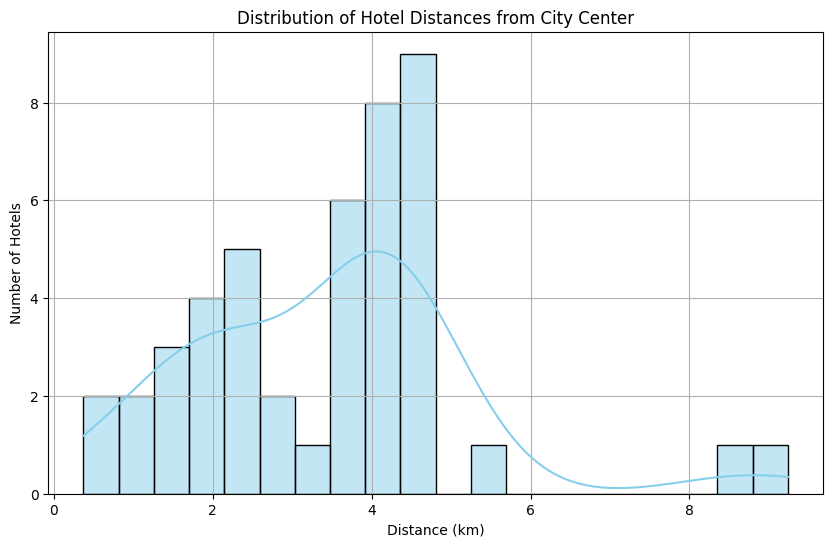

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_hotels['value'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Hotel Distances from City Center')
plt.xlabel('Distance (km)')
plt.ylabel('Number of Hotels')
plt.grid(True)
plt.show()


#### **Geographical Distribution of hotels**

In [71]:
import folium
from folium.plugins import MarkerCluster

# Create a map centered on Paris
map_hotels = folium.Map(location=[48.8566, 2.3522], zoom_start=13)

# Add markers for hotels
marker_cluster = MarkerCluster().add_to(map_hotels)

for _, row in df_hotels.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Name: {row['name']}<br>Rating: {row['rating']}<br>Distance: {row['value']} km",
    ).add_to(marker_cluster)

# Save map to HTML
map_hotels.save("paris_hotels_map.html")
print("Hotel map saved as 'paris_hotels_map.html'.")


Hotel map saved as 'paris_hotels_map.html'.


### Hotel Ratings Distribution

<ipython-input-72-b4d3c023ed5c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_hotels['rating'], palette='viridis')


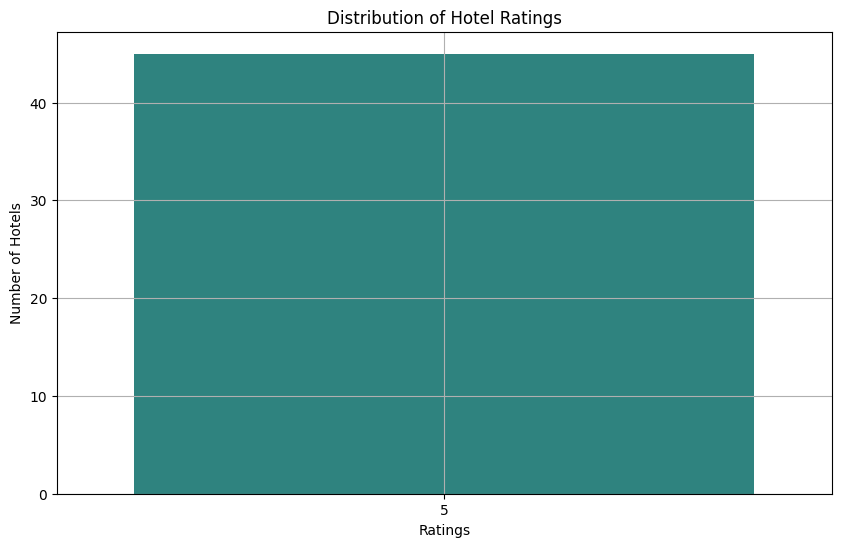

In [72]:
# Bar plot of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x=df_hotels['rating'], palette='viridis')
plt.title('Distribution of Hotel Ratings')
plt.xlabel('Ratings')
plt.ylabel('Number of Hotels')
plt.grid(True)
plt.show()


### Combine Hotel and Restaurant Data

In [ ]:
# Merge or overlay restaurants and hotels on the same map
for _, row in restaurants.iterrows():
    folium.CircleMarker(
        location=[row['latitude_restaurant'], row['longitude_restaurant']],
        radius=5,
        color="red",
        fill=True,
        fill_opacity=0.6,
        popup=f"Restaurant: {row['Title']}<br>Rating: {row['Mark']}",
    ).add_to(marker_cluster)

# Save updated map
map_hotels.save("paris_hotels_restaurants_map.html")
print("Combined map saved as 'paris_hotels_restaurants_map.html'.")


### Top 10 Cuisine Types

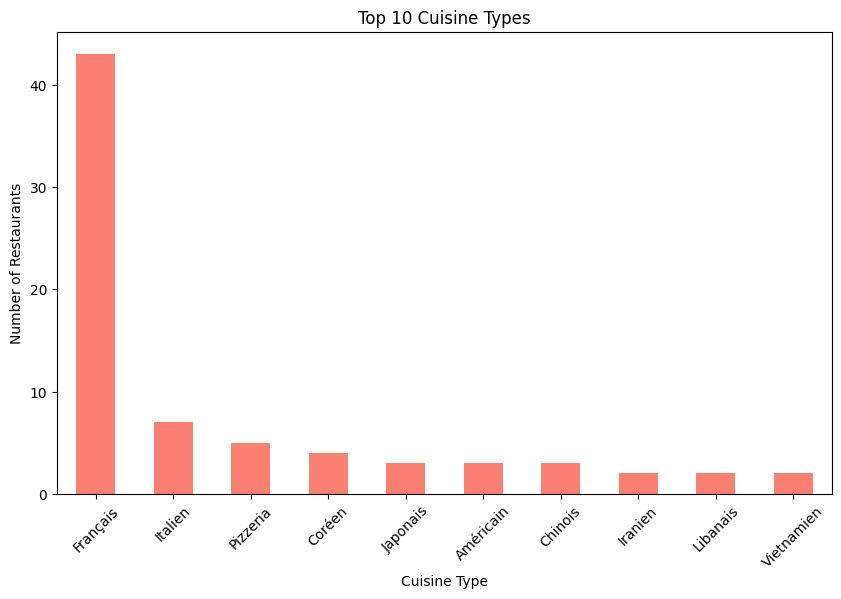

In [67]:
plt.figure(figsize=(10, 6))
restaurants['Type_of_Restaurant'].value_counts().head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Cuisine Types')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

### Distribution of Restaurant Prices

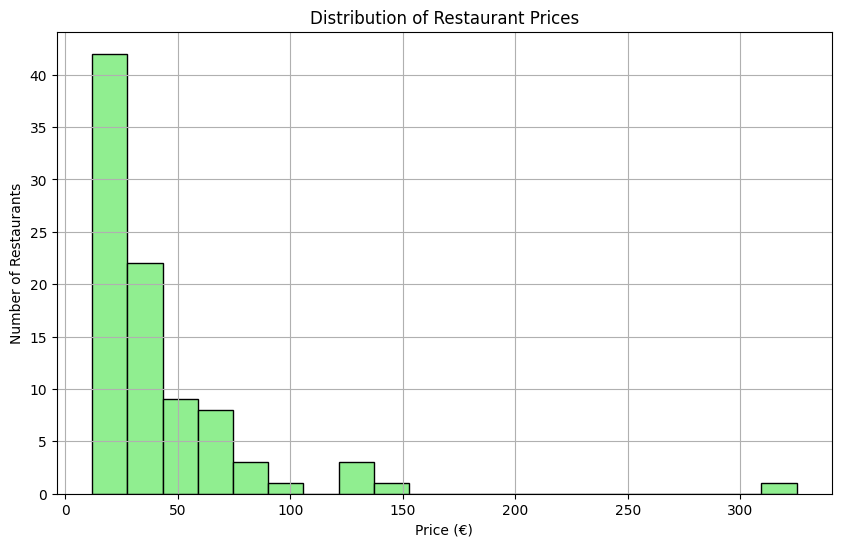

In [68]:
plt.figure(figsize=(10, 6))
plt.hist(restaurants['Price'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Restaurant Prices')
plt.xlabel('Price (€)')
plt.ylabel('Number of Restaurants')
plt.grid(True)
plt.show()


### Ratings by Cuisine Type

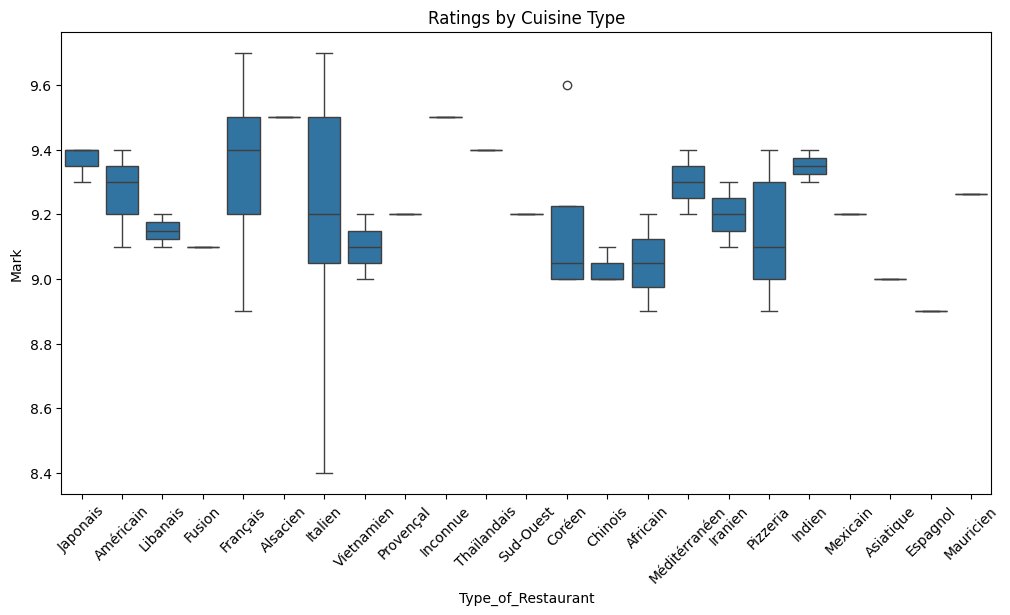

In [69]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type_of_Restaurant', y='Mark', data=restaurants)
plt.title('Ratings by Cuisine Type')
plt.xticks(rotation=45)
plt.show()

### Data Cleaning (Visualizing Missing Data)

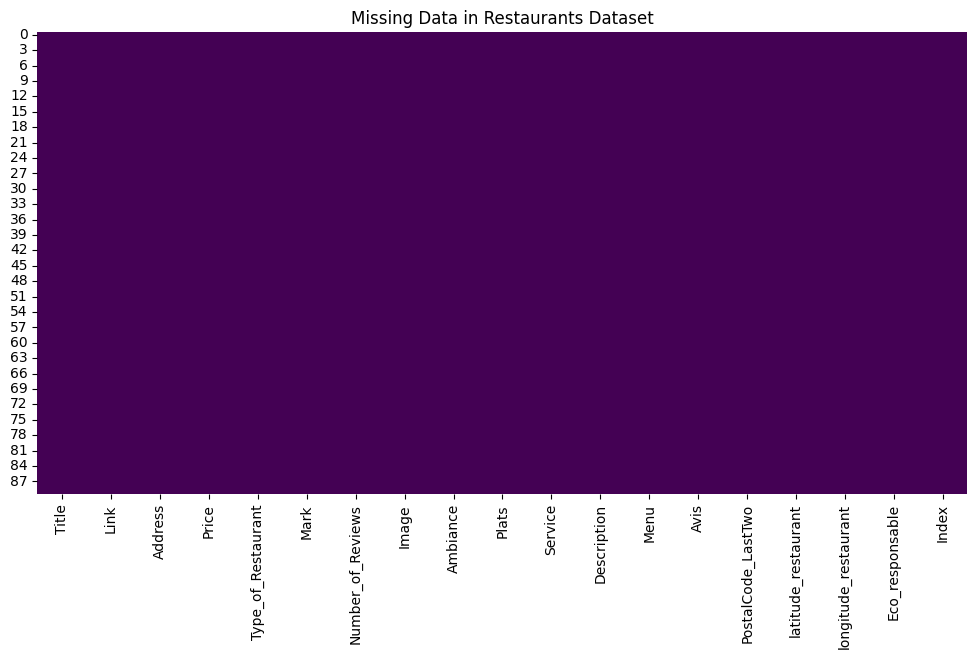

In [73]:
plt.figure(figsize=(12, 6))
sns.heatmap(restaurants.isnull(), cbar=False, cmap="viridis")
plt.title('Missing Data in Restaurants Dataset')
plt.show()



### Analysis

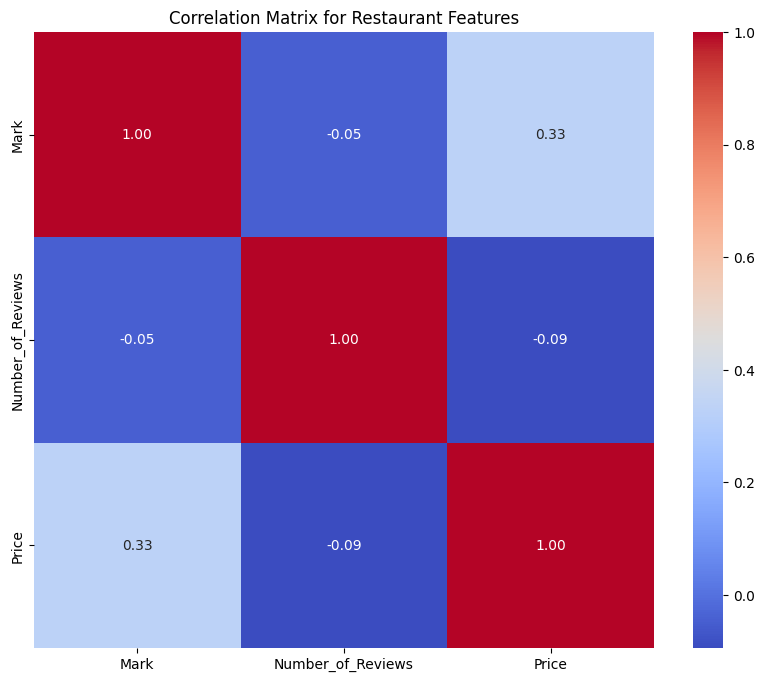

In [74]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = restaurants[['Mark', 'Number_of_Reviews', 'Price']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix for Restaurant Features')
plt.show()






### Top 10 Restaurants by Score

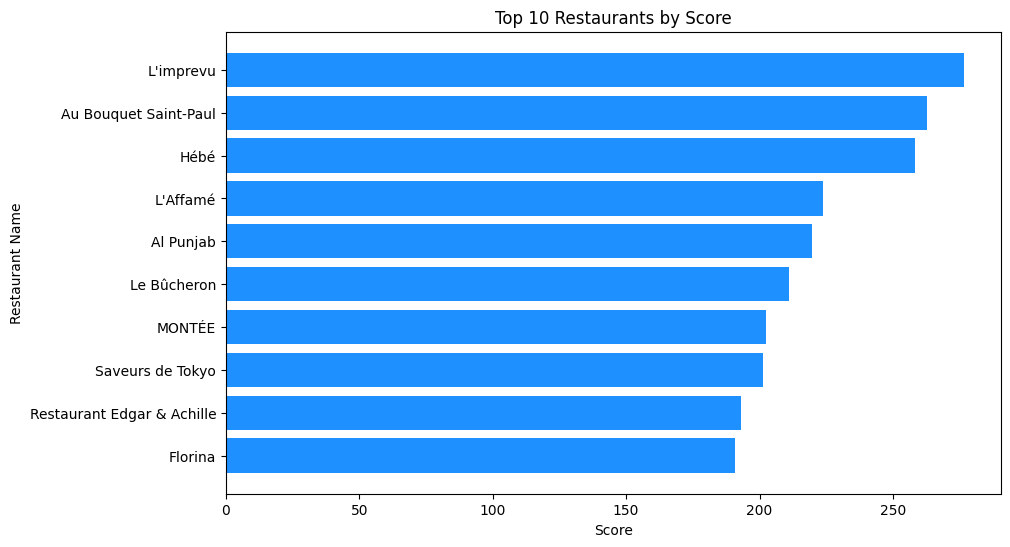

In [78]:
restaurants['Score'] = (restaurants['Mark'] * 0.6 + restaurants['Number_of_Reviews'] * 0.3 - restaurants['Price'] * 0.1)
top_restaurants = restaurants.sort_values(by='Score', ascending=False).head(10)

# Visualize Rankings
plt.figure(figsize=(10, 6))
plt.barh(top_restaurants['Title'], top_restaurants['Score'], color='dodgerblue')
plt.title('Top 10 Restaurants by Score')
plt.xlabel('Score')
plt.ylabel('Restaurant Name')
plt.gca().invert_yaxis()
plt.show()